Python Odyssey :
https://www.youtube.com/watch?v=TOx7Rn9x_eY

Python Odyssey repo:
https://github.com/AjitAntony

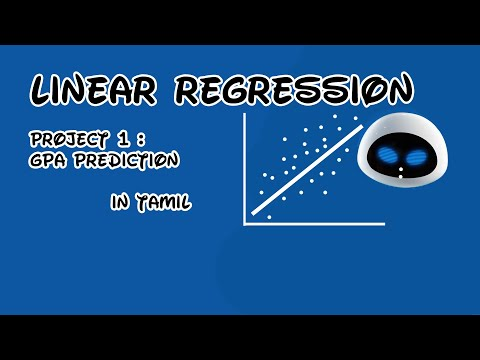

In [1]:

from IPython.display import YouTubeVideo
YouTubeVideo('TOx7Rn9x_eY')

# Use Simple linear regression to predict what will be the Final year GPA grade  using SAT score for students currently enrolling in college 

Help the college to predict what would be the  Final Year GPA score using SAT score 

1. Find pattern on the students entrance  test scores and Final year GPA

2. Is entrance test really necessary , can money spent on entrance test cost be saved 

3. placement preparation 






OLS Ordinary Least Square : Method to fit the linear regression model and  estimation the parameter  
    
#  $ \hat{y} = m*x + b$

normal equation for linear regression with only one feature
    
- m,b coefficients of the line of best fit.

-  find the coefficients m and b which minimize the sum of squared errors between the actual value y and the observed value y^.

#  $ MSE = \frac {1} {n} \sum_{i=1}^{n}(y_{i}-\hat{y_{i}})^2 $

#  $m = \frac{n\sum xy - \sum x\sum y}{n\sum x^2 - (\sum x)^2} $
 
# $ b = n\sum y - m*\sum x $
    

     
 
In linear regression you can choose between calculating the optimal weights using the normal equation or try to approximate the optimal weights using gradient descent.  
 

# import the data using pandas  and visualization library 

In [1]:
#import the librabry
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#read csv file and store in dataframe
#Pandas DataFrame is a 2 dimensional data structure / table with rows and columns.
#DataFrames are particularly useful because powerful methods are built into them
#read_Csv to read a csv file and store that as pandas object /dataframe in varible 
score_data=pd.read_csv("D:/Linear Regression/GAP Prediction.csv")

In [3]:
#First n rows of the DataFrame
print(type(score_data))
score_data.head()

<class 'pandas.core.frame.DataFrame'>


,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
#Last n rows of the DataFrame
score_data.tail()

,SAT,GPA
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76
83,2050,3.81


In [5]:
#ndex, Datatype and Memory information
score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
SAT    84 non-null int64
GPA    84 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [6]:
#Summary statistics for numerical columns
score_data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [7]:
#check for null value 
score_data.isnull().sum()

SAT    0
GPA    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000287811C6908>,
      dtype=object)

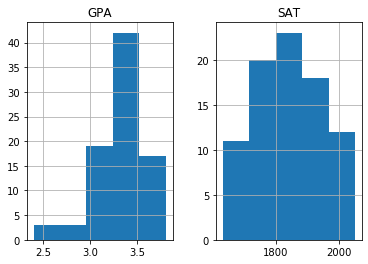

In [8]:
#visualize the distirubtion
score_data.hist(bins=5)


In [9]:
#correlation between columns 
score_data.corr()


,SAT,GPA
SAT,1.000000,0.637184
GPA,0.637184,1.000000


In [10]:
#return a numpy array 
X=score_data["SAT"].values.reshape(-1,1)
Y=score_data["GPA"].values.reshape(-1,1)

In [11]:
X

array([[1714],
       [1664],
       [1760],
       [1685],
       [1693],
       [1670],
       [1764],
       [1764],
       [1792],
       [1850],
       [1735],
       [1775],
       [1735],
       [1712],
       [1773],
       [1872],
       [1755],
       [1674],
       [1842],
       [1786],
       [1761],
       [1722],
       [1663],
       [1687],
       [1974],
       [1826],
       [1787],
       [1821],
       [2020],
       [1794],
       [1769],
       [1934],
       [1775],
       [1855],
       [1880],
       [1849],
       [1808],
       [1954],
       [1777],
       [1831],
       [1865],
       [1850],
       [1966],
       [1702],
       [1990],
       [1925],
       [1824],
       [1956],
       [1857],
       [1979],
       [1802],
       [1855],
       [1907],
       [1634],
       [1879],
       [1887],
       [1730],
       [1953],
       [1781],
       [1891],
       [1964],
       [1808],
       [1893],
       [2041],
       [1893],
       [1832],
       [18

In [12]:
Y

array([[2.4 ],
       [2.52],
       [2.54],
       [2.74],
       [2.83],
       [2.91],
       [3.  ],
       [3.  ],
       [3.01],
       [3.01],
       [3.02],
       [3.07],
       [3.08],
       [3.08],
       [3.12],
       [3.17],
       [3.17],
       [3.17],
       [3.17],
       [3.19],
       [3.19],
       [3.19],
       [3.2 ],
       [3.21],
       [3.24],
       [3.28],
       [3.28],
       [3.28],
       [3.28],
       [3.28],
       [3.28],
       [3.28],
       [3.29],
       [3.29],
       [3.29],
       [3.31],
       [3.32],
       [3.34],
       [3.37],
       [3.37],
       [3.37],
       [3.38],
       [3.38],
       [3.39],
       [3.39],
       [3.4 ],
       [3.4 ],
       [3.4 ],
       [3.41],
       [3.41],
       [3.41],
       [3.42],
       [3.42],
       [3.42],
       [3.44],
       [3.47],
       [3.47],
       [3.47],
       [3.47],
       [3.48],
       [3.49],
       [3.49],
       [3.5 ],
       [3.51],
       [3.51],
       [3.52],
       [3.

In [13]:
X.shape

(84, 1)

In [14]:
Y.shape

(84, 1)

Text(0, 0.5, 'GPA')

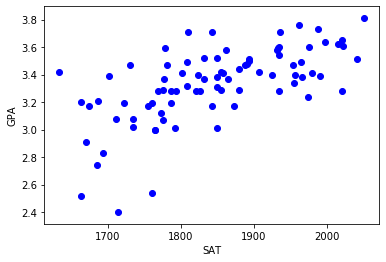

In [15]:
plt.scatter(X,Y,color='b')
plt.xlabel("SAT")
plt.ylabel("GPA")

In [16]:
#pairplot plot a pairwise relationships in a dataset
#pd.plotting.scatter_matrix(score_data,figsize=(10,10),hist_kwds = {'bins': 5})

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=42)

In [18]:
print("xtrain",xtrain.shape)
print("xtest",xtest.shape)
print("ytrain",xtrain.shape)
print("ytest",ytest.shape)

xtrain (63, 1)
xtest (21, 1)
ytrain (63, 1)
ytest (21, 1)


In [19]:
from sklearn.linear_model import LinearRegression


In [20]:
lr=LinearRegression()

In [21]:
model=lr.fit(xtrain,ytrain)

In [22]:
ypred=model.predict(xtest)


In [23]:
ytest

array([[3.6 ],
       [2.4 ],
       [3.47],
       [3.2 ],
       [3.08],
       [3.59],
       [3.02],
       [3.17],
       [2.83],
       [3.52],
       [3.37],
       [3.4 ],
       [3.31],
       [3.73],
       [3.47],
       [3.44],
       [3.29],
       [3.64],
       [3.38],
       [3.41],
       [3.07]])

In [24]:
ypred

array([[3.47288907],
       [3.14682824],
       [3.24612858],
       [3.07124141],
       [3.17795223],
       [3.47140697],
       [3.17795223],
       [3.33653636],
       [3.11570425],
       [3.32171541],
       [3.37062454],
       [3.50549515],
       [3.34691102],
       [3.55144009],
       [3.40323062],
       [3.39137386],
       [3.35580359],
       [3.56626103],
       [3.5203161 ],
       [3.53958333],
       [3.23723601]])

Text(0, 0.5, 'GPA')

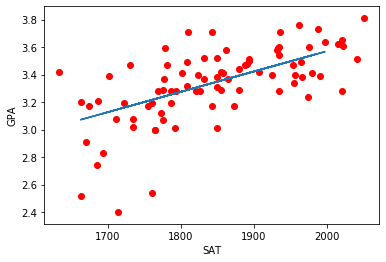

In [25]:
plt.scatter(X,Y,color='r')
plt.plot(xtest,ypred)
#plt.xlim(100,)
#plt.ylim(0,)
plt.xlabel("SAT")
plt.ylabel("GPA")

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# MAE,MSE,RMSE

<b> measure of spread that tells you how scattered your data is around the regression line  ,measures the overall accuracy of the model <b>

 
# $ \text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=1}^{n_{\text{samples}}} \left| y_i - \hat{y}_i \right|. $
 

In [27]:
print("MAE",mean_absolute_error(ytest,ypred))

MAE 0.15548838076312174


# $ \text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=1}^{n_\text{samples}} (y_i - \hat{y}_i)^2 $

In [28]:
print("MSE",mean_squared_error(ytest,ypred))

MSE 0.04587175782015936


# $ \text{RMSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sqrt {\sum_{i=1}^{n_\text{samples}} (y_i - \hat{y}_i)^2 }$


In [29]:
#Root mean Squared erro
from  math import sqrt as sqrt
print("RMSE",sqrt(mean_squared_error(ytest,ypred)))

RMSE 0.2141769311110778


# how well the model fits the data.

# $ \hat{y}_i\text{ : predicted value} $

# $ \bar{y} \text{ : mean of our observation} = \frac{1}{n} \sum_{i=1}^{n} y_i $

# $ {y}_i\text{ : actual value} $
 






# $ R^2(y, \hat{y}) = 1 - \frac{RSS}{TSS} $




# $ RSS =  {\sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $

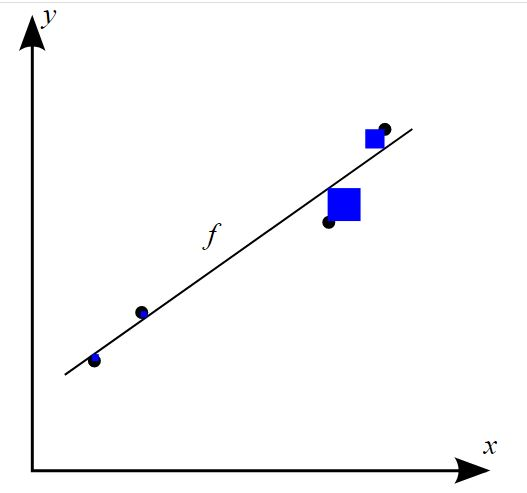

how good is the model with independent variable



# $ TSS =  {\sum_{i=1}^{n} (y_i - \bar{y})^2} $
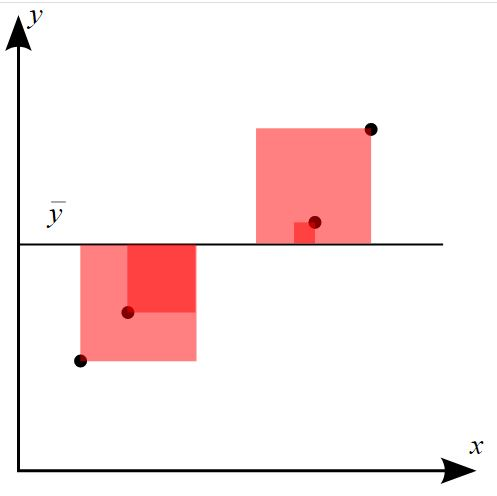

how good is the model without slope but with the y intercept passing over the mean

# $ R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $

-   <b>  how much error we eliminate when we choose to use a regression line instead of a perfectly horizontal line </b>

- <b> $ R^2 $ tells percentage variation in y which is explained by all the x variables together<b>
    
- <b>   It assumes every independent variable in the model helps to explain variation in the dependent variable .In reality, some independent variables (predictors) don't help to explain dependent (target) variable. In other words, some variables do not contribute in predicting target variable.<b>
    
- <b> 0% measures zero predictive power of the model <b>
    
- <b> 100% the model explains all the variation of the target variable <b>

- <b> coefficient of determination of 60% tells you that the regression line is much closer to many of the data points than the horizontal line is to those data points <b>

- <b> range - ranges from 0 to 1  sometimes can get negative value as well <b>

- <b> higher  $ R^2 $ value the better model ,sometimes expressed as percentage <b>



# Problem

- The inclusion of numerous independent variables, even though they have very little explanatory power on the dependent variable, will increase the value of $ R^2 $ even if the independent variable is insignificant



In [30]:
r2= r2_score(ytest,ypred)
print("R^2 (coefficient of determination ,)",r2)



R^2 (coefficient of determination ,) 0.48516938725866743



 # $ Adjusted   R^2  =  1- \frac {(1-R^2) (1-N)}{(N-p-1)} $
 
 $R^2  : R^2 value  $  
 
p : No of predictors /independent varaibles 
 
N : total samples  

Adjusted R2 will always be less than or equal to R2.

In [31]:
N=len(ytest)
p=1

ar2=1-((1-r2)*(1-N))/(N-p-1)

print("Ajusted r2" , ar2)

Ajusted r2 1.54192696078035


||Coefficient of Correlation |Coefficient of determination (r square)|ajusted r square|
|:----:|:-----|:----:|----:|
|Definiton|measures the strength and the direction of a linear relationship between two variables (x and y) |It provides percentage variation in y which is explained by all the x variables together , indicates strength of Linear Regression model |It measures the proportion of variation explained by only those independent variables that really help in explaining the dependent variable . - It penalizes you for adding independent variable that do not help in predicting the dependent variable.|
|range|possible values between -1 to  1|possible values between -infinity to  1 ,sometimse might have negative value |It provides percentage variation in y which is explained by all the x variables together , indicates strength of Linear Regression model |
|problem||Every time you add a independent variable to a model, the R-squared increases, even if the independent variable is insignificant. It never declines|Adjusted R-squared increases only when independent variable is significant and affects dependent variable|

In [32]:
#How to predict a new value that model has not seen /which was not part of the training/test set

model.predict([[2500]])

array([[4.31175465]])

In [33]:
model.coef_

array([[0.00148209]])

In [34]:
model.intercept_

array([0.60651797])

# save the model using pickel

Python pickle module is used for serializing and de-serializing python object structures. The process to converts any kind of python objects (list, dict, etc.) into byte streams (0s and 1s) is called pickling or serialization or flattening or marshalling. We can converts the byte stream (generated through pickling) back into python objects by a process called as unpickling.

Why Pickle?: In real world sceanario, the use pickling and unpickling are widespread as they allow us to easily transfer data from one server/system to another and then store it in a file or database.

object serialization This process / procedure of saving a ML Model is also known as object serialization - representing an object with a stream of bytes, in order to store it on disk, send it over a network or save to a database.

deserialization While the restoring/reloading of ML Model procedure is known as deserialization.


In [35]:
import pickle
pickel_m = "D:\Linear Regression\saved_model\linear_reg.pkl"  

with open(pickel_m, 'wb') as file:  
    pickle.dump(model, file)

In [36]:

with open(pickel_m, 'rb') as file:  
    load_model = pickle.load(file)

In [37]:
load_model.predict([[2500]])

array([[4.31175465]])